In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline # ensures our plot appears in line

In [7]:
# Read in and explore the data
GolfDset = pd.read_csv('golf-dataset.csv')

print(GolfDset.head())
print('')
print("number of row and columns : {}".format(GolfDset.shape))

    Outlook  Temp Humidity  Windy Play Golf
0     Rainy   Hot     High  False        No
1     Rainy   Hot     High   True        No
2  Overcast   Hot     High  False       Yes
3     Sunny  Mild     High  False       Yes
4     Sunny  Cool   Normal  False       Yes

number of row and columns : (14, 5)


In [8]:
print(GolfDset['Play Golf'].unique()) # prints the unique values of the column ' Play Golf'
print("")
print(GolfDset['Play Golf'].value_counts())

['No' 'Yes']

Yes    9
No     5
Name: Play Golf, dtype: int64


In [33]:
# Encoding the data
from sklearn.preprocessing import LabelEncoder

Col = GolfDset.columns[:] # stores all the column names

data1 = GolfDset[Col]
data2 = data1.copy() # deep copys the dataset

for i in Col:
    LE = LabelEncoder() # creating an instance of the encoder class
    LE.fit(GolfDset[i])
    data2[i] = LE.transform(GolfDset[i])

data2.head(n=5) 

,Outlook,Temp,Humidity,Windy,Play Golf
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1


In [28]:
# split data into features X, and label,y.

X = data2.iloc[:, :-1] # data2.iloc[:,:-1].values gets only values in a np array

y = data2['Play Golf']


In [30]:
# Import the Multinomial class from the naive bayes module and traing the model
from sklearn.naive_bayes import MultinomialNB

mNB = MultinomialNB( alpha = 1e-8, class_prior = [9/14, 5/14]) # an instance of the imported class

# We train the model by calling the .fit() function on the mNB object
Model = mNB.fit(X, y)

Model

MultinomialNB(alpha=1e-08,
              class_prior=[0.6428571428571429, 0.35714285714285715])

In [32]:
# predicting the labels for different inputs and checking the accuracy of predictions, using 2 accuracy metrics
from sklearn import metrics

print(metrics.accuracy_score(y, Model.predict(X)))
print('')
print(metrics.classification_report(y, Model.predict(X)))

0.7857142857142857

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.67      0.80         9

    accuracy                           0.79        14
   macro avg       0.81      0.83      0.78        14
weighted avg       0.87      0.79      0.79        14



In [34]:
# new prediction using 'Sunny', 'Mild', 'High', 'True' : 2, 2, 0, 1

print(Model.predict([[2,2,0,1]])) # 1 to play golf, and 0 to not play golf

[0]


In [35]:
print(Model.predict_proba([[2,2,0,1]]))

[[0.83371525 0.16628475]]


In [44]:
# using the gaussian classifyer instead, and spliting our data into training and test sets

from sklearn.model_selection import train_test_split

X = X.iloc[:, [0,1]]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [46]:
# Feature Scaling - puting it between a value of -1 and 1
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train[:3])

[[-1.60356745 -0.60302269]
 [ 1.06904497  0.90453403]
 [ 1.06904497  0.90453403]]


In [47]:
# fitting Naive bayes to the Training set

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train) # fit the training data and training solution

GaussianNB()

In [48]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

print(y_pred)

[0 0 0 1]


In [49]:
# making the confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm

array([[0, 0],
       [3, 1]], dtype=int64)

# Predicted 0 'no play golf' , guessed 0 wrong. And 3 'play golf', guessed 1 wrong.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


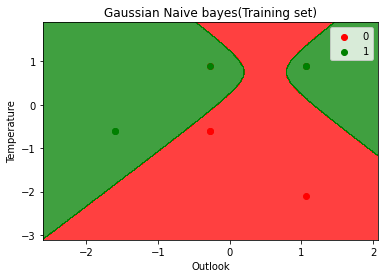

In [64]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1 , stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1 , stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                                       alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title("Gaussian Naive bayes(Training set)")
plt.xlabel('Outlook')
plt.ylabel('Temperature')
plt.legend()
plt.show()

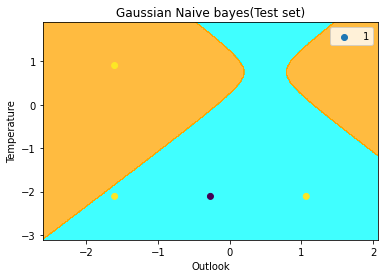

In [65]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1 , stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1 , stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                                       alpha = 0.75, cmap = ListedColormap(('cyan', 'orange')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('cyan', 'orange'))(i), label = j)
    
plt.title("Gaussian Naive bayes(Test set)")
plt.xlabel("Outlook")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [66]:
# Calculating the accuracy 

print( metrics.classification_report(y_test, y_pred))

print('accuracy score =', metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.25      0.40         4

    accuracy                           0.25         4
   macro avg       0.50      0.12      0.20         4
weighted avg       1.00      0.25      0.40         4

accuracy score = 0.25


C:\Users\Ndidi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ndidi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ndidi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
